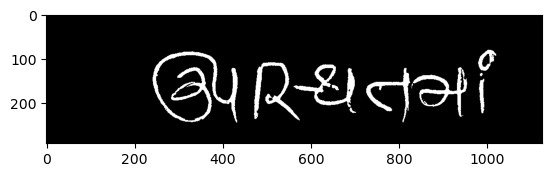

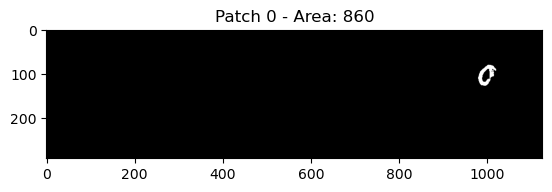

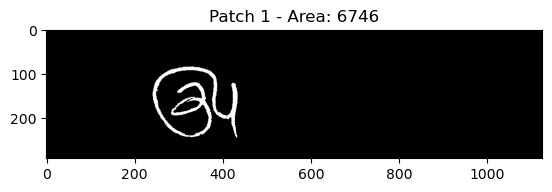

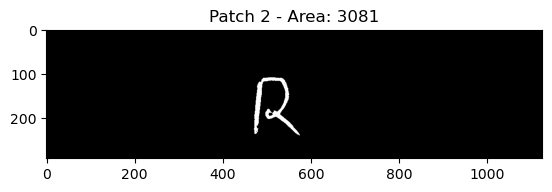

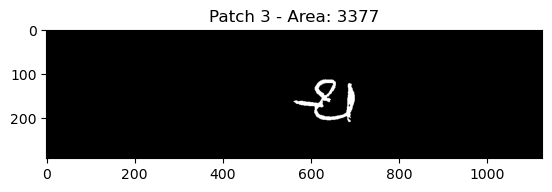

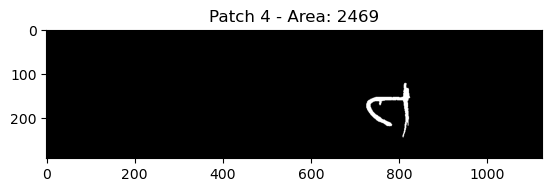

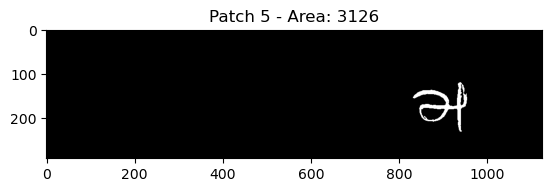

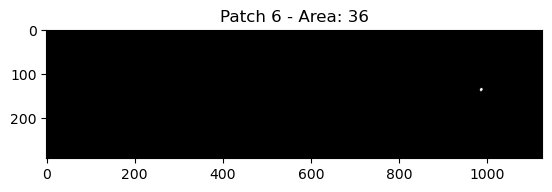

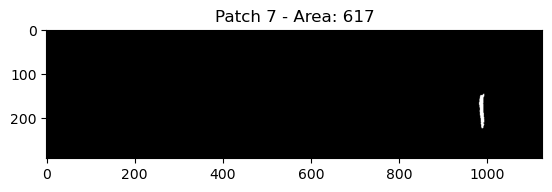

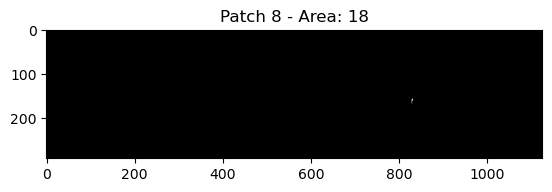

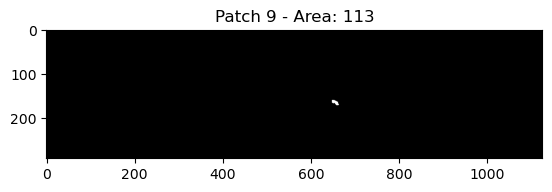

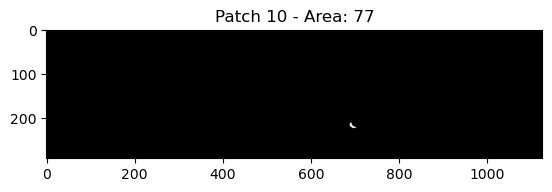

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_to_binary(image_path, threshold=127):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, threshold, 255, cv2.THRESH_BINARY_INV)
    return binary

def find_patches(binary_image):
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)
    
    # Filter out small components based on some heuristic, for example, size
    min_area = 10  # This is a parameter you might need to tune
    patches = [(stats[i], (labels == i).astype(np.uint8) * 255) for i in range(1, num_labels) if stats[i, cv2.CC_STAT_AREA] > min_area]
    
    return patches

# Define the path to your image file
image_path = '/home/tanishpatel01/Downloads/Images_dataset/Gujarati/13.jpg'  # Replace with your image path

# Convert the image to a binary image
binary_image = convert_to_binary(image_path)

# Find patches
patches = find_patches(binary_image)

plt.figure()
plt.imshow(binary_image, cmap='gray')

# Display the patches
for i, (stat, patch) in enumerate(patches):  # Display first 5 patches
    plt.figure()
    plt.imshow(patch, cmap='gray')
    plt.title(f'Patch {i} - Area: {stat[cv2.CC_STAT_AREA]}')
    plt.show()


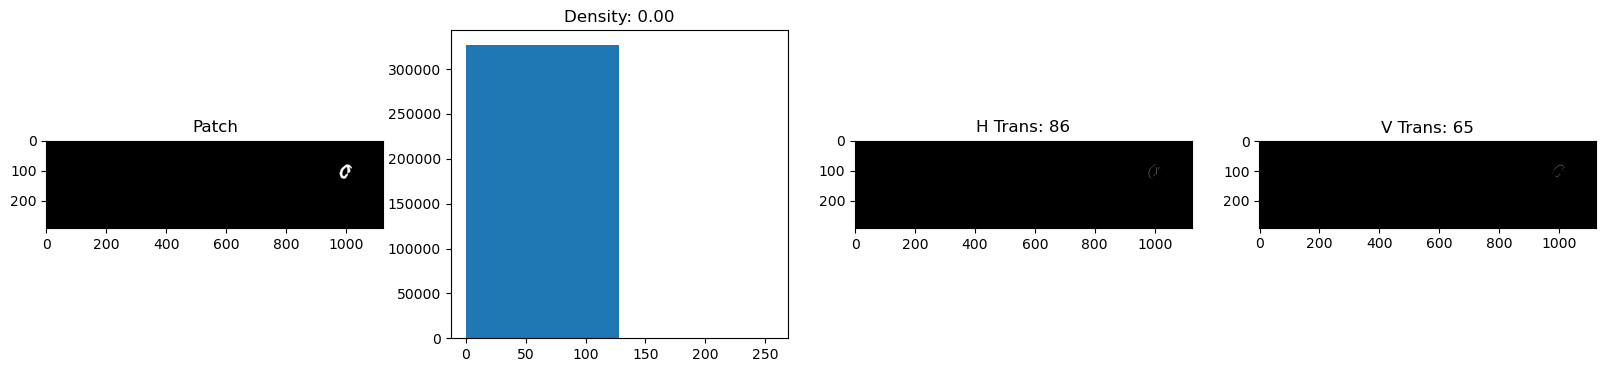

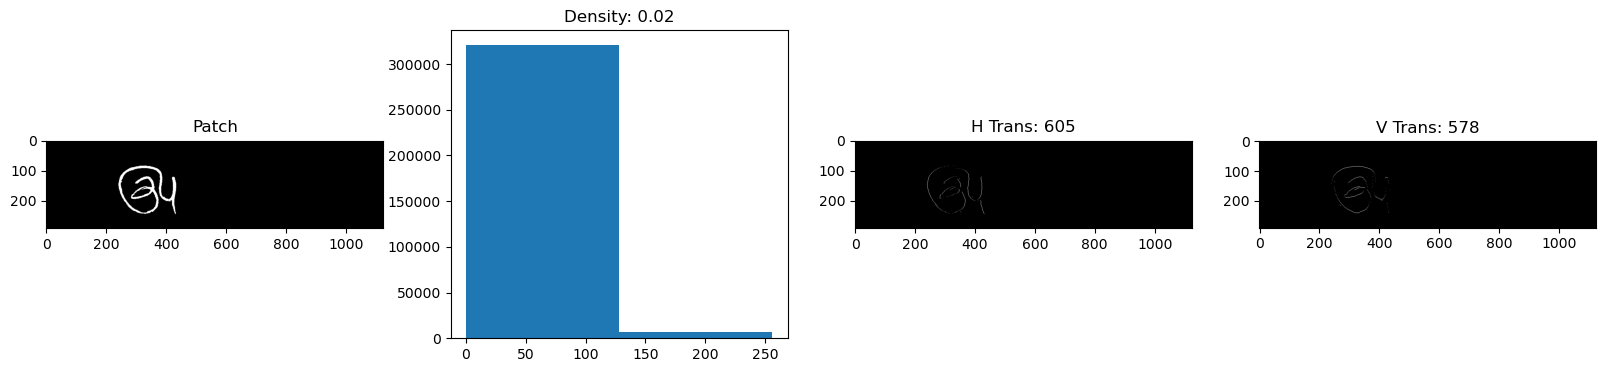

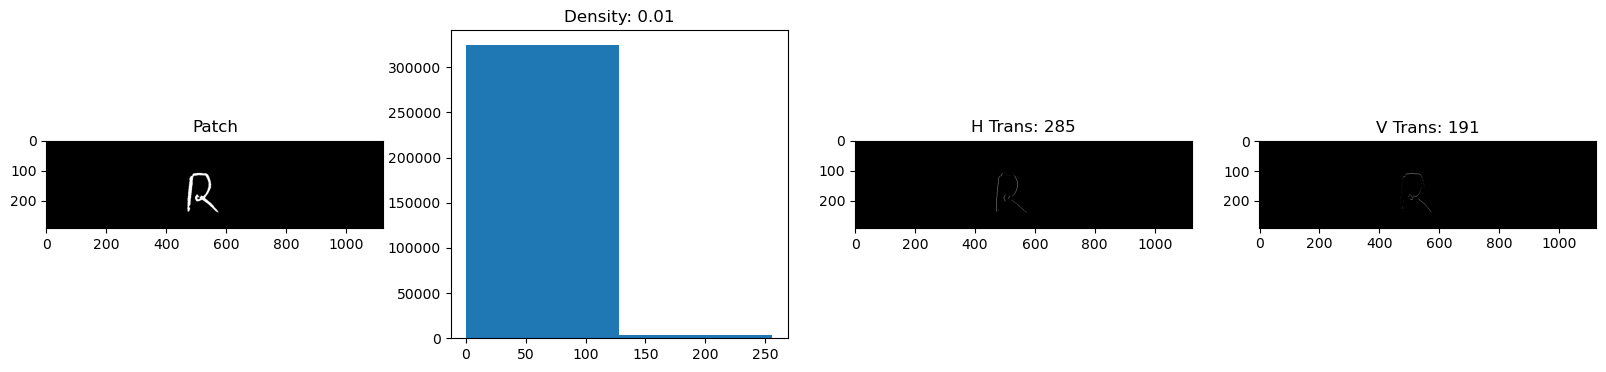

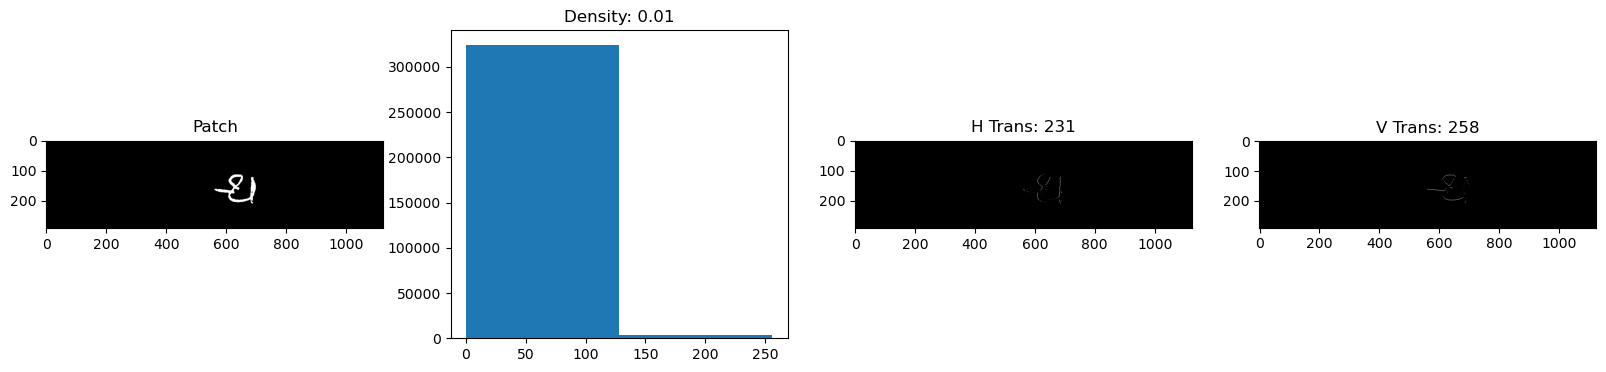

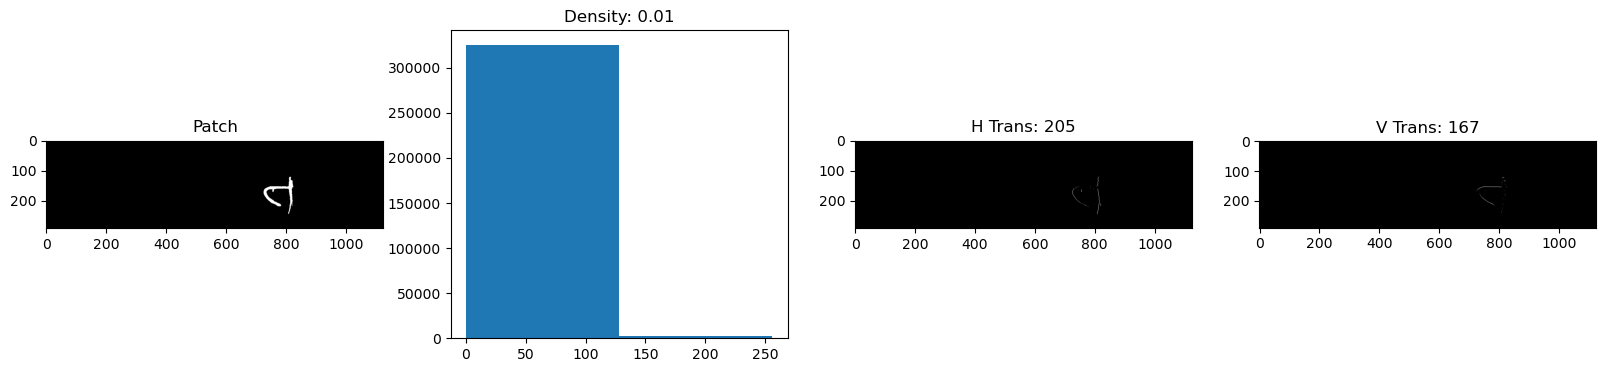

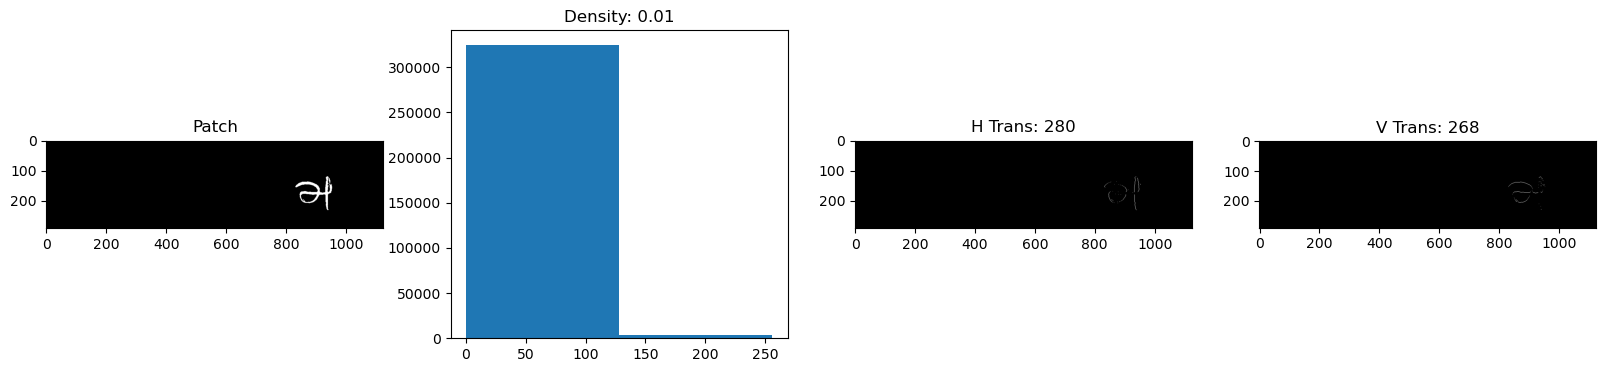

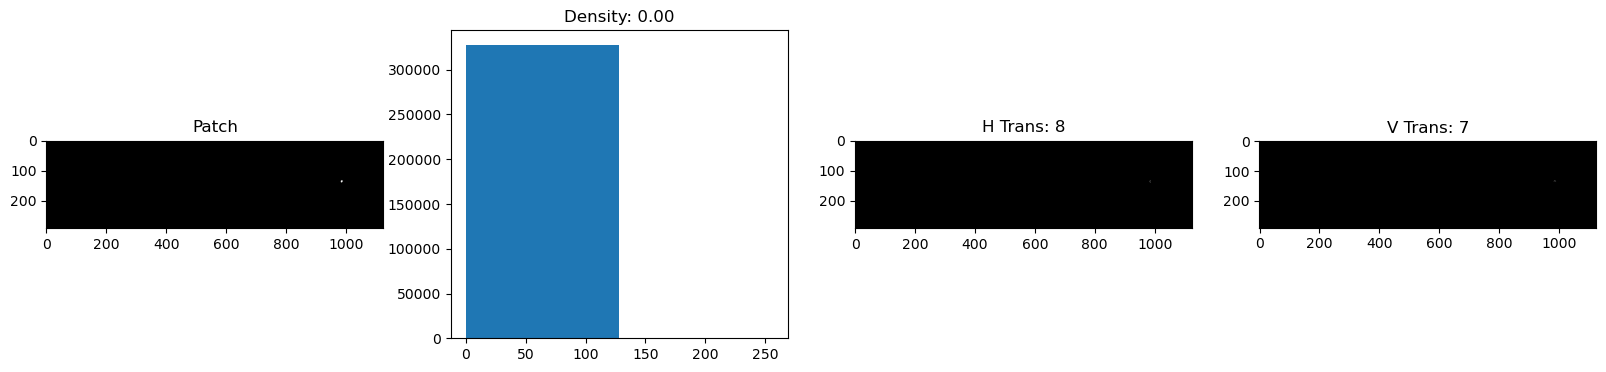

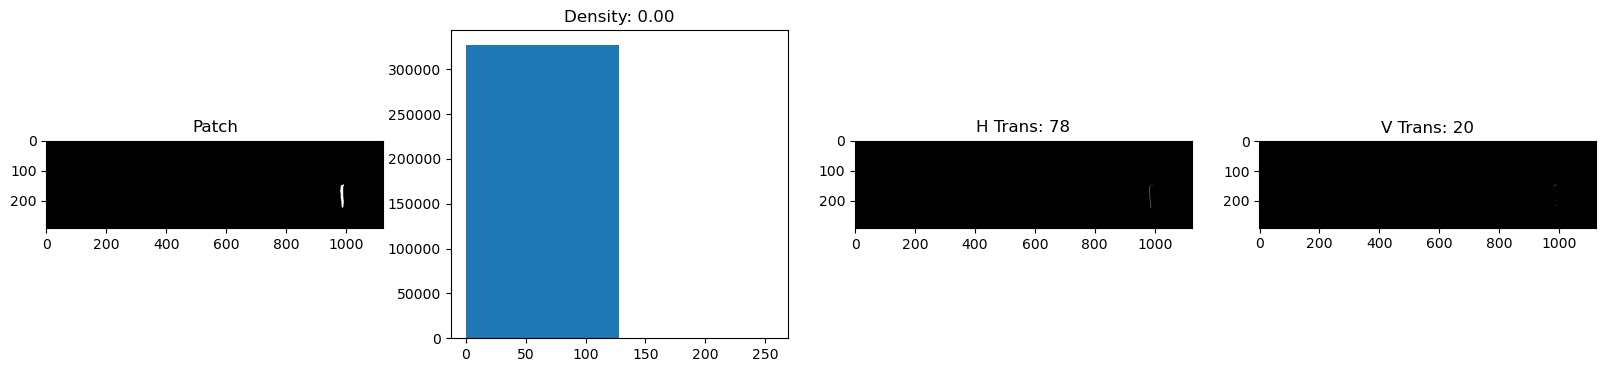

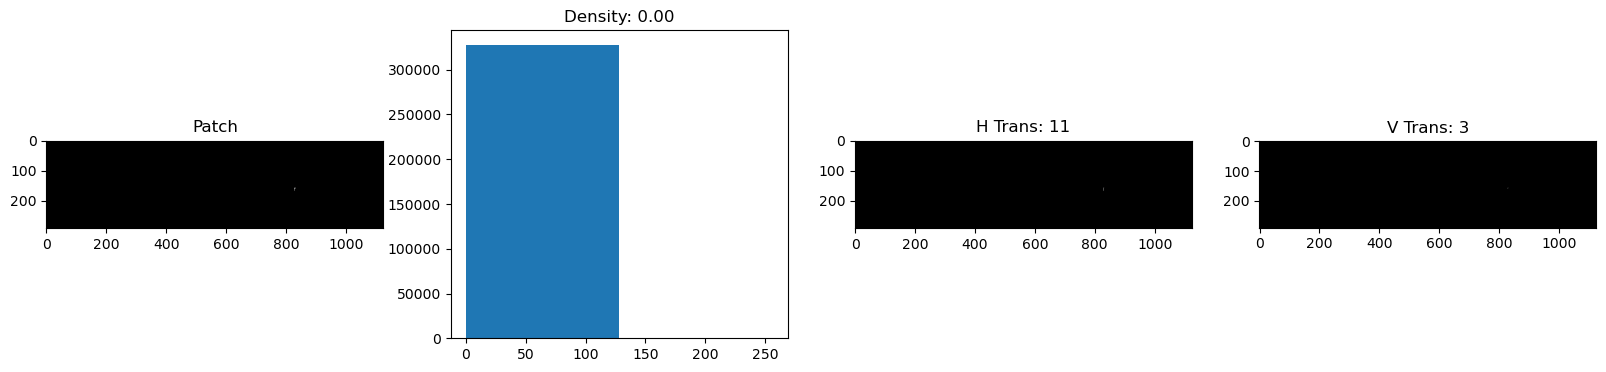

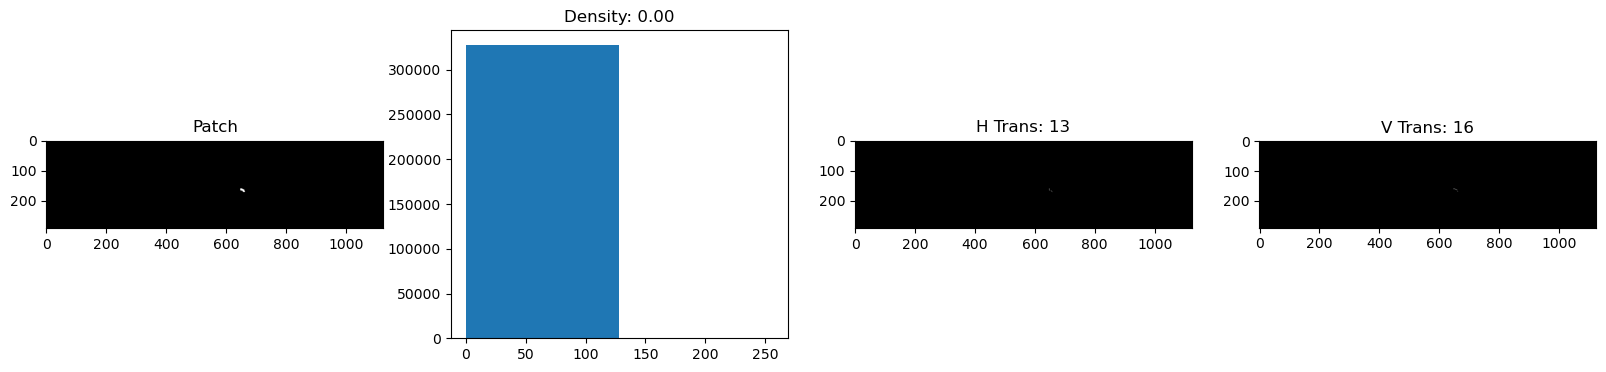

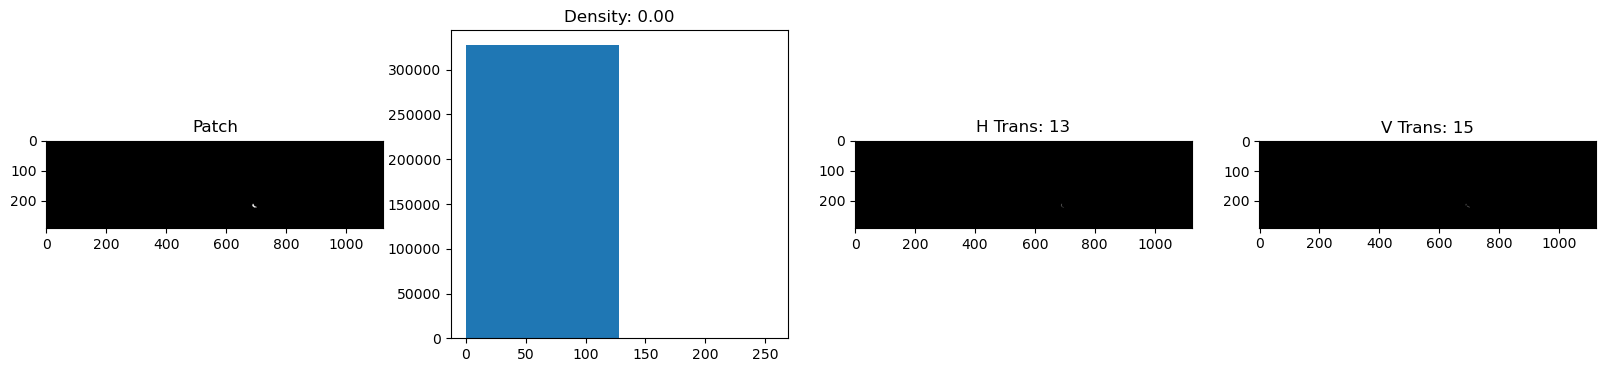

Patch 0 features: {'height': 48, 'width': 41, 'density': 0.0026246238547789516, 'aspect_ratio': 0.8541666666666666, 'horizontal_transitions': 86.33725490196079, 'vertical_transitions': 65.25490196078431}
Patch 1 features: {'height': 161, 'width': 193, 'density': 0.020588037818998615, 'aspect_ratio': 1.1987577639751552, 'horizontal_transitions': 605.364705882353, 'vertical_transitions': 578.2588235294118}
Patch 2 features: {'height': 131, 'width': 104, 'density': 0.009402867554155757, 'aspect_ratio': 0.7938931297709924, 'horizontal_transitions': 285.1137254901961, 'vertical_transitions': 190.7450980392157}
Patch 3 features: {'height': 97, 'width': 139, 'density': 0.010306226462312232, 'aspect_ratio': 1.4329896907216495, 'horizontal_transitions': 230.90196078431373, 'vertical_transitions': 258.0078431372549}
Patch 4 features: {'height': 124, 'width': 100, 'density': 0.007535111973778177, 'aspect_ratio': 0.8064516129032258, 'horizontal_transitions': 204.8, 'vertical_transitions': 166.6509

In [11]:
# Function to calculate the density of foreground pixels in a patch
def calculate_density(patch):
    return np.sum(patch) / (patch.shape[0] * patch.shape[1] * 255)

# Function to calculate horizontal and vertical transitions in a patch
def calculate_transitions(patch):
    horizontal_transitions = np.sum(np.abs(np.diff(patch, axis=1))) / 255
    vertical_transitions = np.sum(np.abs(np.diff(patch, axis=0))) / 255
    return horizontal_transitions, vertical_transitions

# Function to extract features from patches
def extract_features(patches):
    features = []
    for stat, patch in patches:
        height = stat[cv2.CC_STAT_HEIGHT]
        width = stat[cv2.CC_STAT_WIDTH]
        density = calculate_density(patch)
        aspect_ratio = width / height if height > 0 else 0
        horizontal_transitions, vertical_transitions = calculate_transitions(patch)
        current_features = {
            "height": height,
            "width": width,
            "density": density,
            "aspect_ratio": aspect_ratio,
            "horizontal_transitions": horizontal_transitions,
            "vertical_transitions": vertical_transitions
        }
        features.append(current_features)
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 4, 1)
        plt.imshow(patch, cmap='gray')
        plt.title('Patch')
        plt.subplot(1, 4, 2)
        plt.hist(patch.ravel(), bins=[0, 128, 256], range=[0, 256])
        plt.title('Density: {:.2f}'.format(density))
        plt.subplot(1, 4, 3)
        plt.title('H Trans: {:.0f}'.format(horizontal_transitions))
        plt.imshow(np.abs(np.diff(patch, axis=1)), cmap='gray')
        plt.subplot(1, 4, 4)
        plt.title('V Trans: {:.0f}'.format(vertical_transitions))
        plt.imshow(np.abs(np.diff(patch, axis=0)), cmap='gray')
        plt.show()
    
    return features

features_list = extract_features(patches)

for i, features in enumerate(features_list):
    print(f'Patch {i} features: {features}')


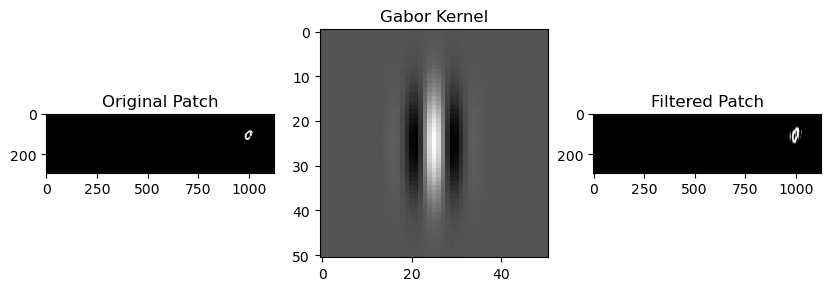

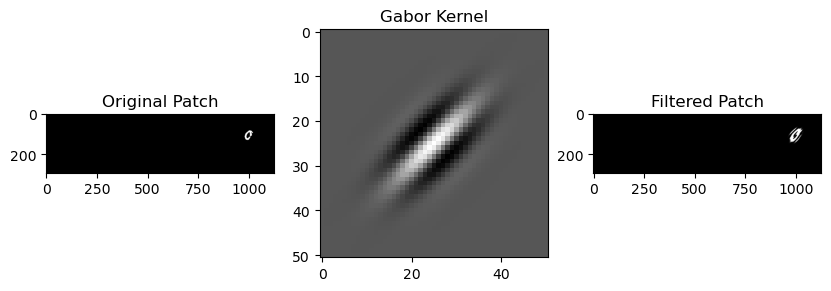

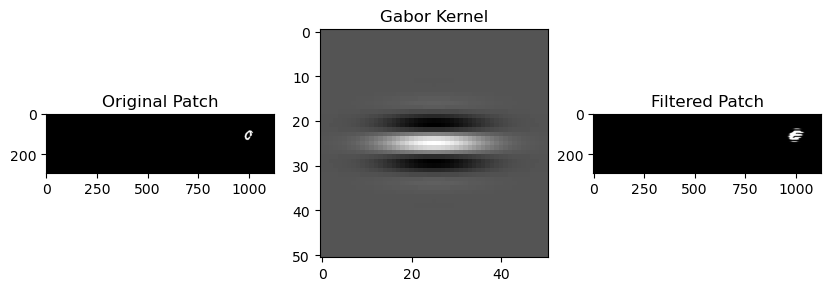

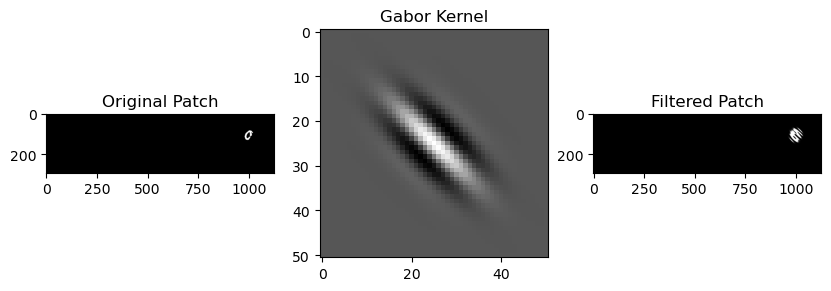

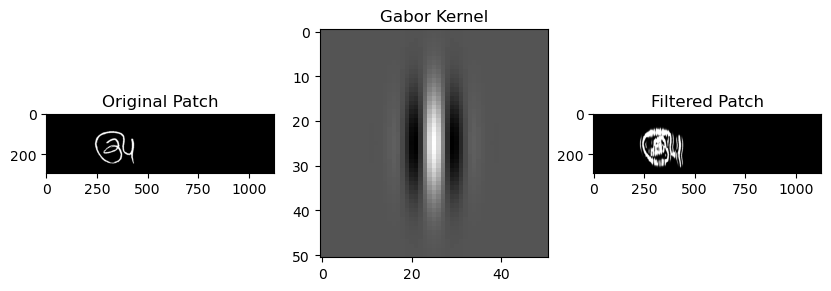

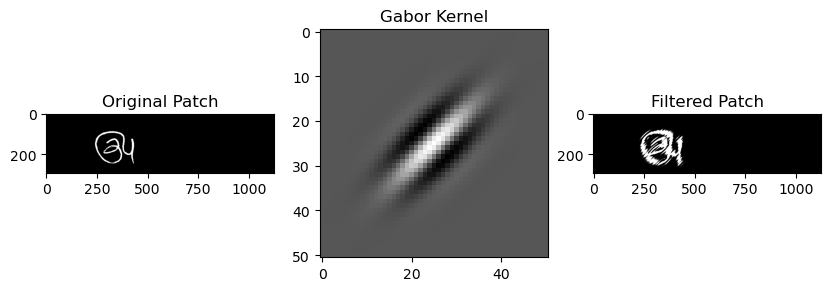

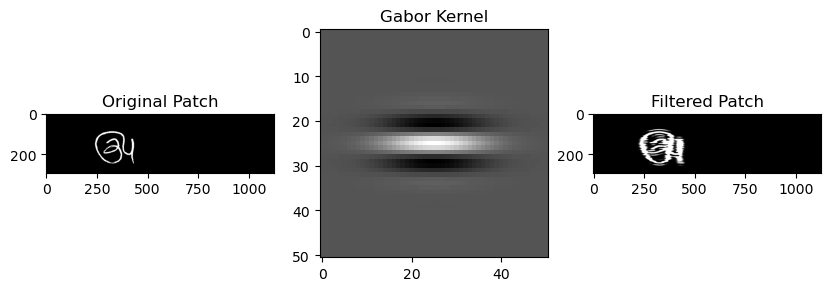

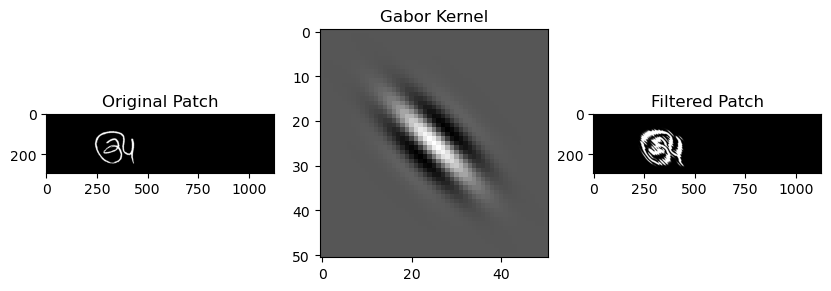

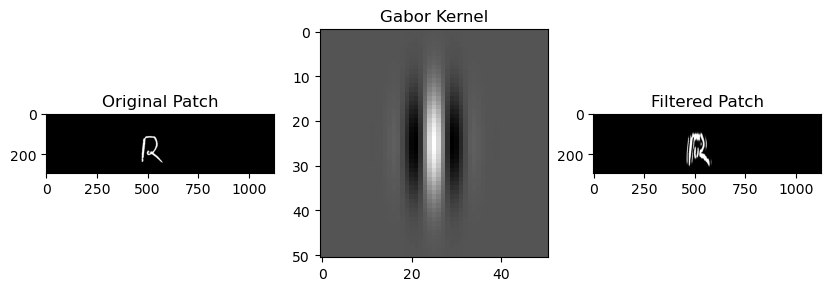

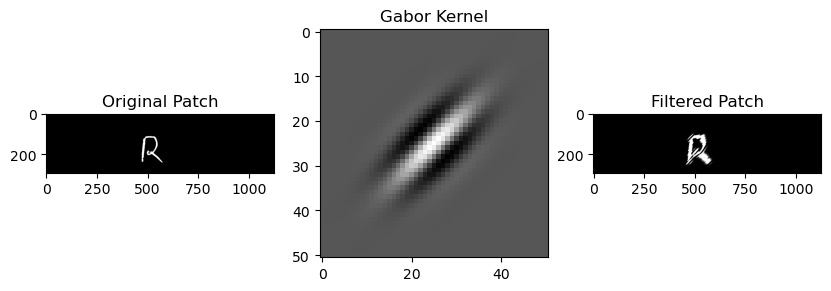

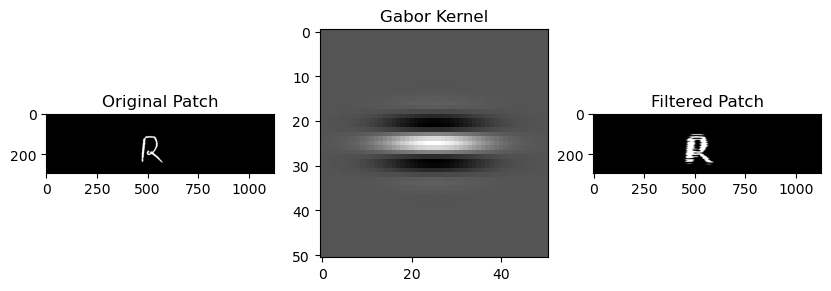

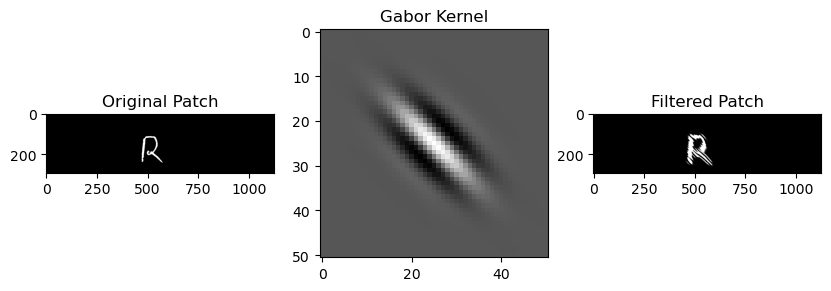

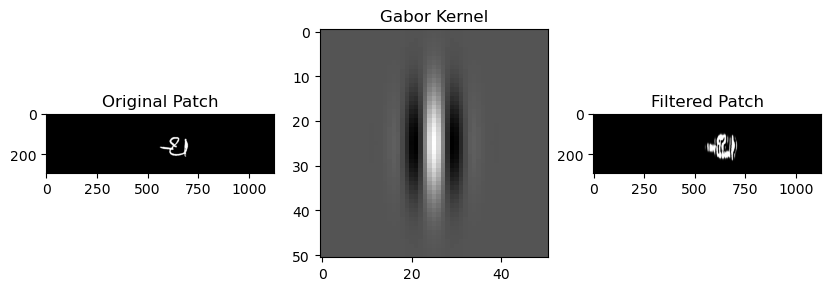

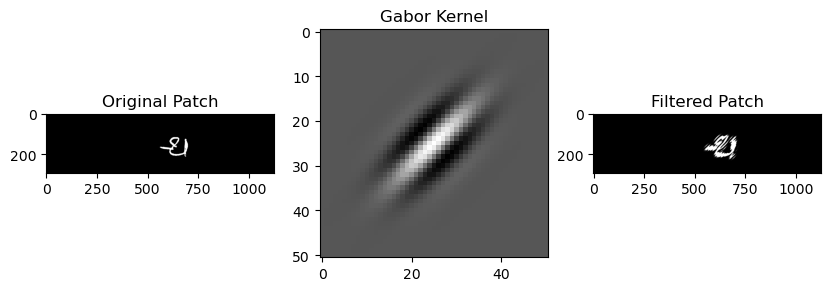

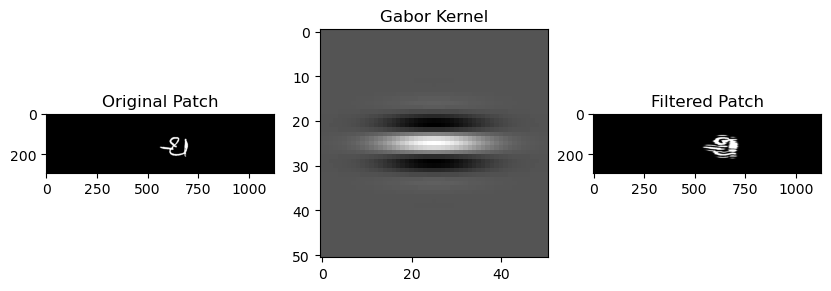

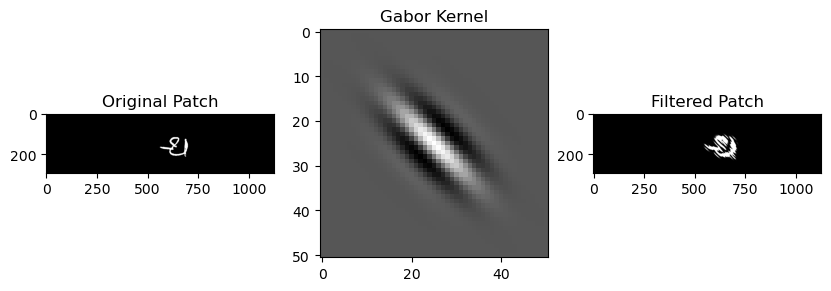

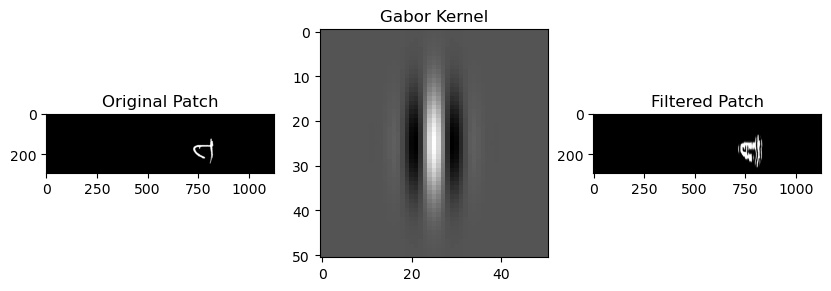

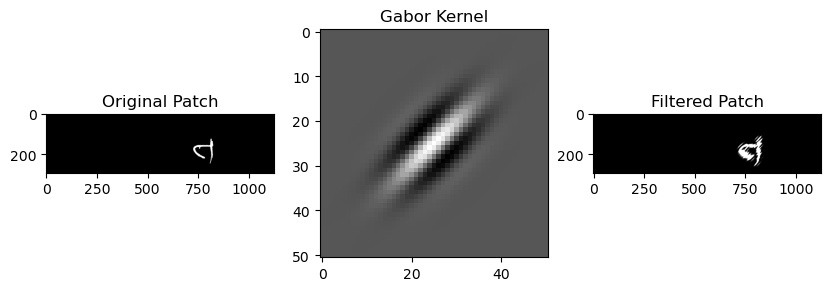

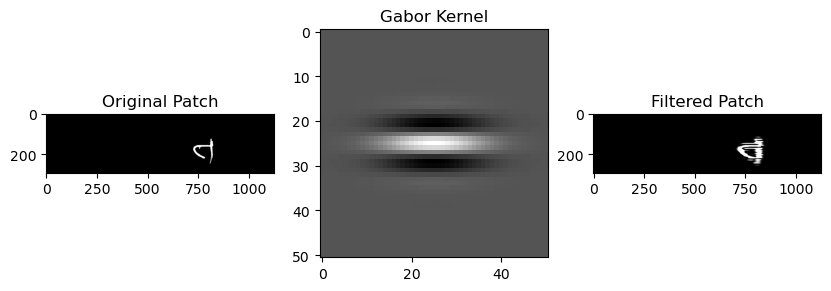

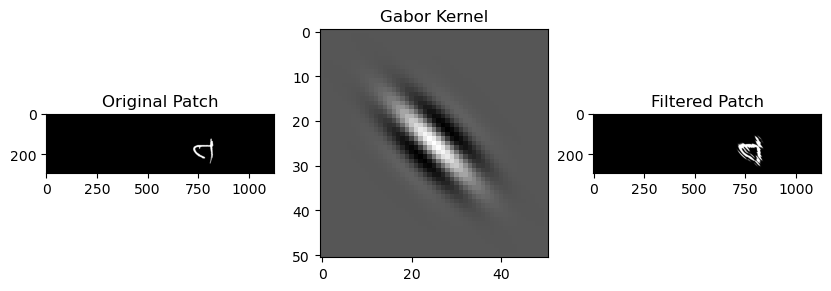

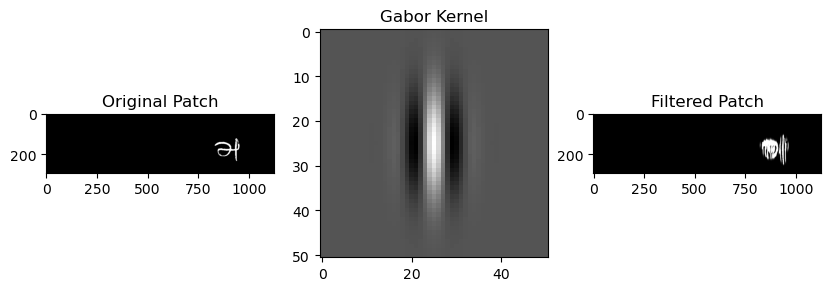

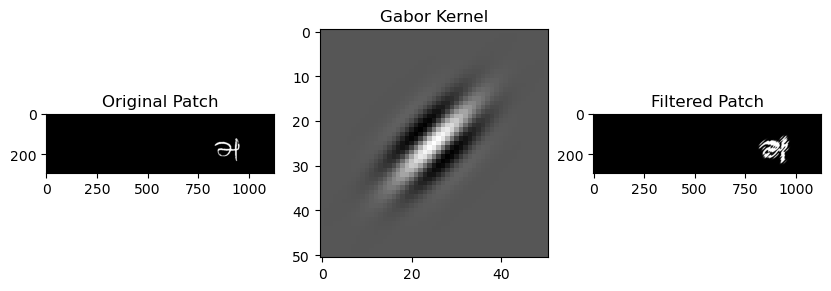

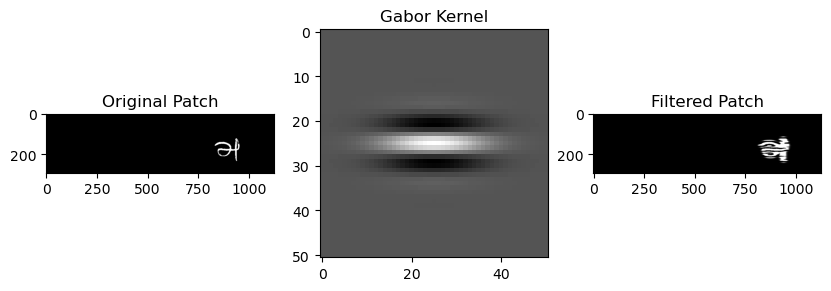

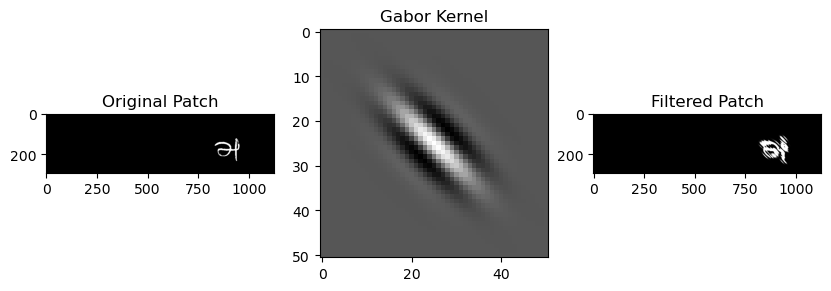

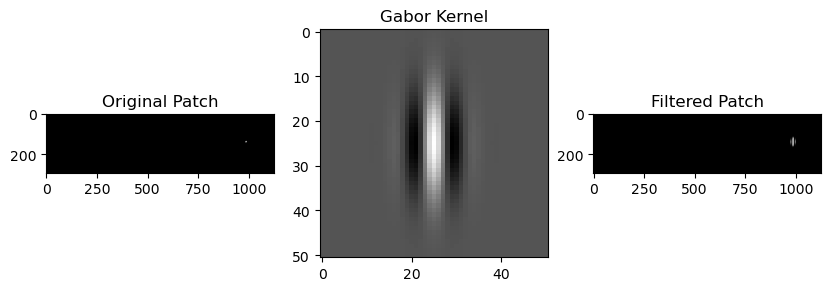

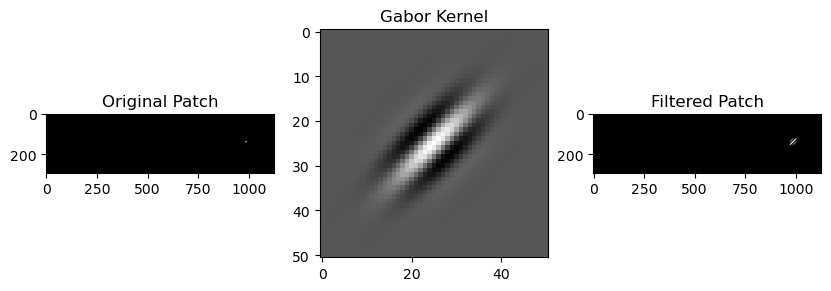

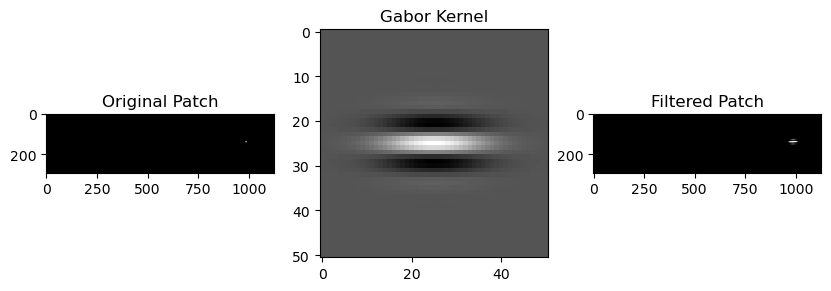

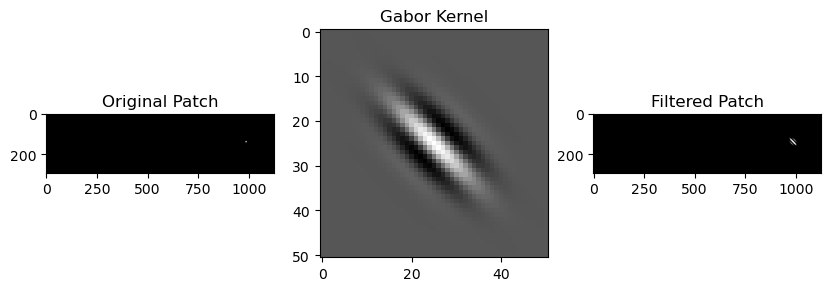

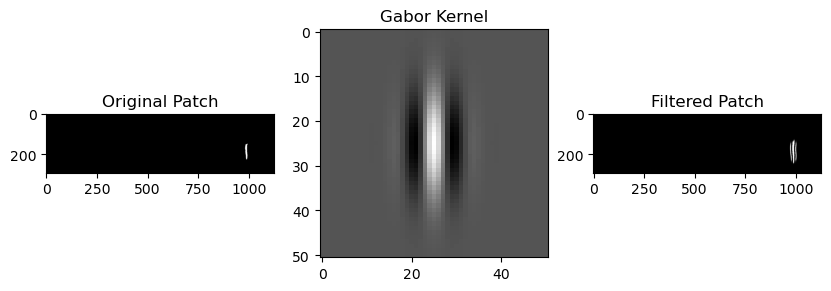

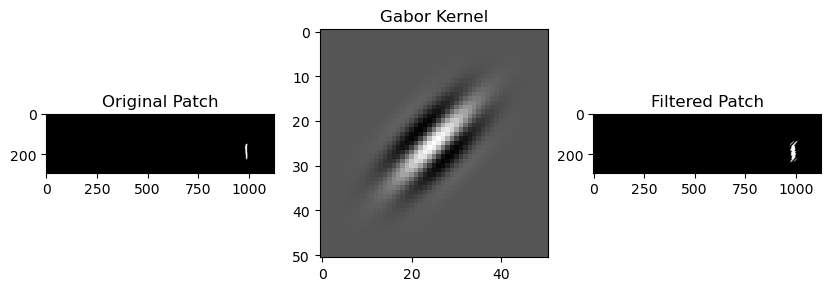

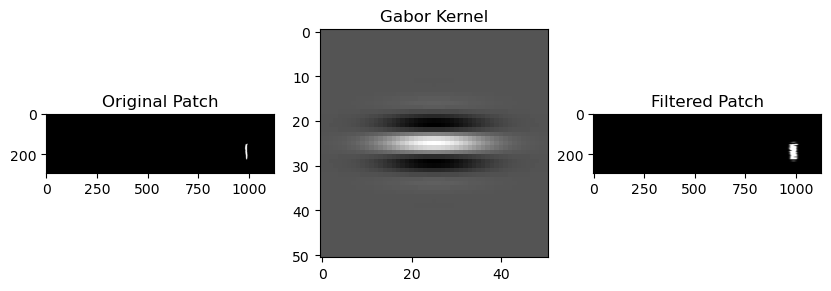

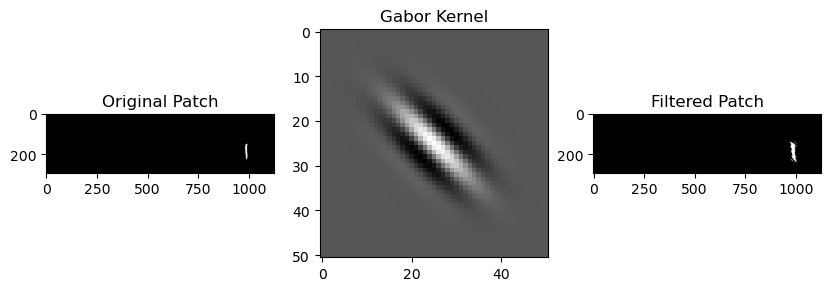

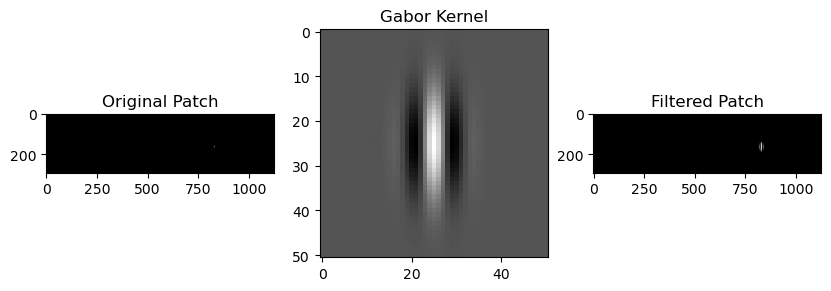

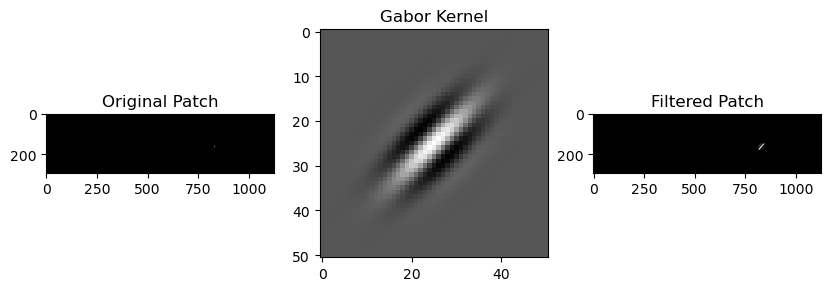

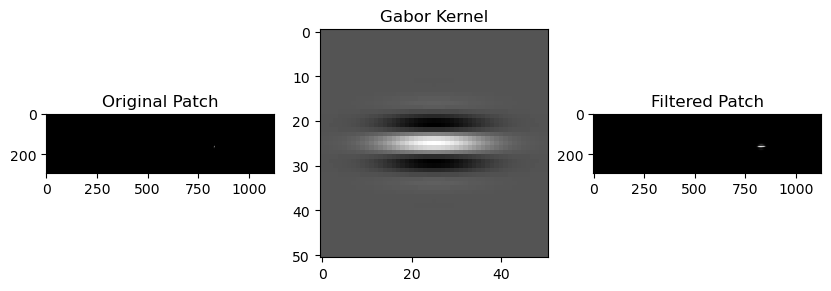

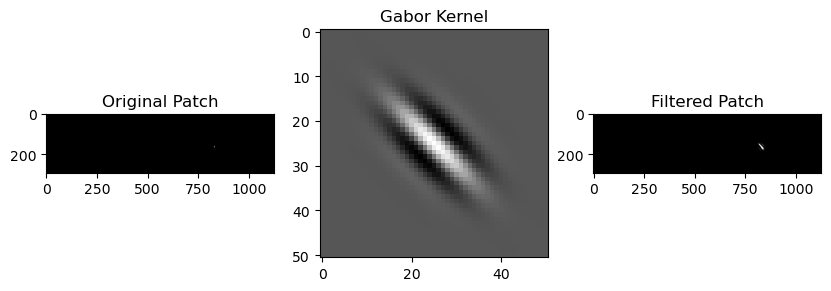

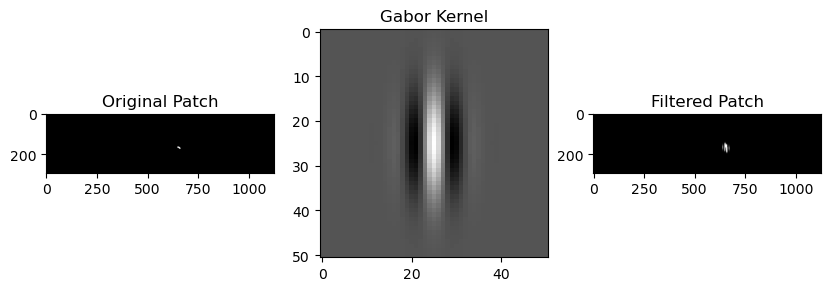

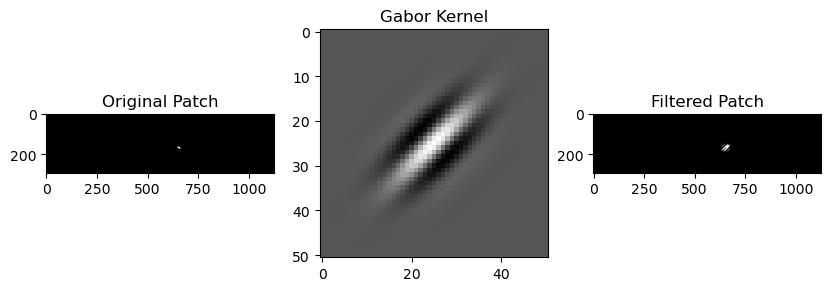

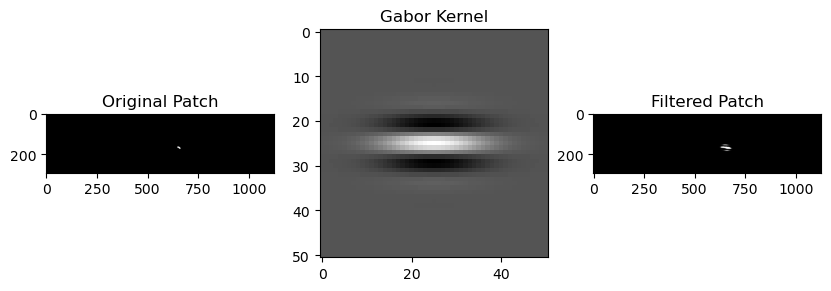

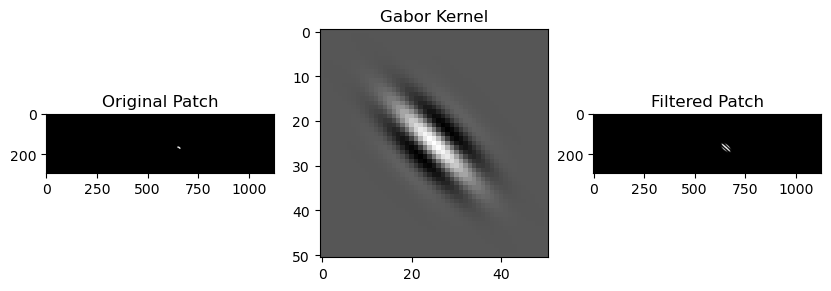

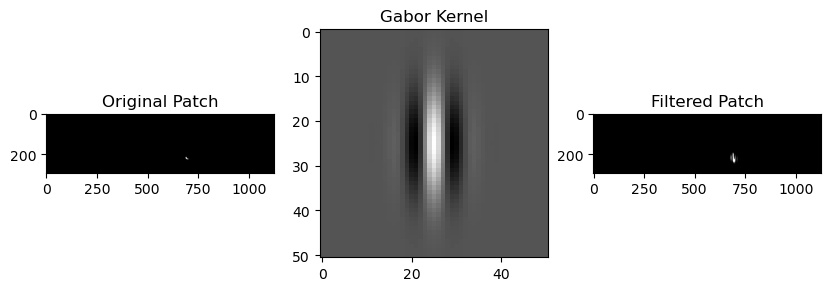

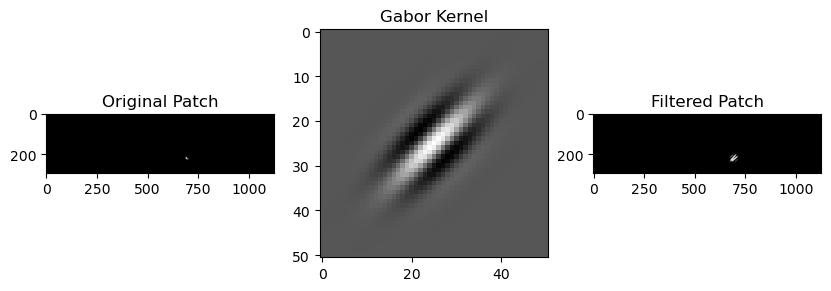

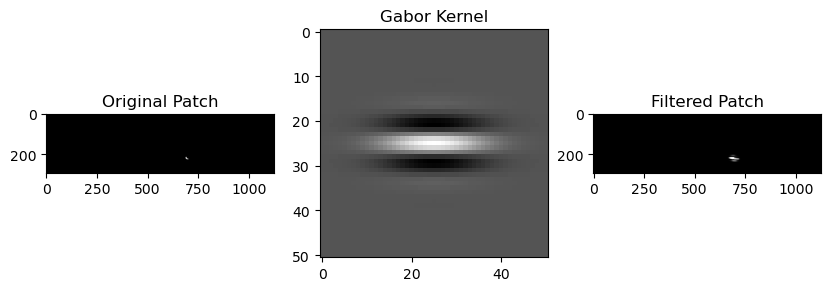

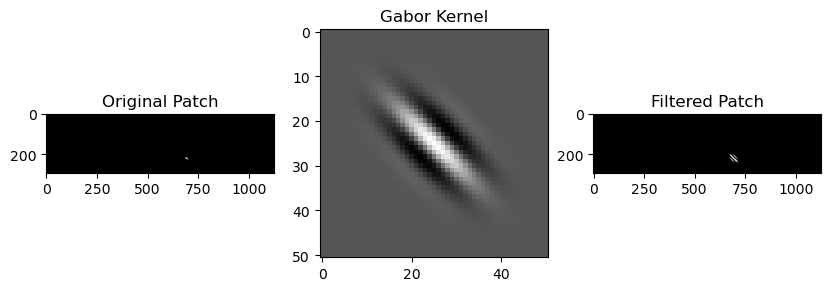

Patch 0 features: {'mean_intensity': 0.0026246238547789516, 'std_intensity': 0.05116380756354906, 'gabor_mean_0': 0.0058163603468524795, 'gabor_std_0': 0.07274236302911279, 'gabor_mean_1': 0.0059917302207424744, 'gabor_std_1': 0.07395638859238464, 'gabor_mean_2': 0.006945427331968721, 'gabor_std_2': 0.07995403155984078, 'gabor_mean_3': 0.006973732099030062, 'gabor_std_3': 0.07946242659926923}
Patch 1 features: {'mean_intensity': 0.020588037818998615, 'std_intensity': 0.14200060041338594, 'gabor_mean_0': 0.05249441594220227, 'gabor_std_0': 0.21434075916301187, 'gabor_mean_1': 0.05079598630025337, 'gabor_std_1': 0.21174188103454064, 'gabor_mean_2': 0.05408736993420966, 'gabor_std_2': 0.21714859739179376, 'gabor_mean_3': 0.05049714062011737, 'gabor_std_3': 0.21082222277044954}
Patch 2 features: {'mean_intensity': 0.009402867554155757, 'std_intensity': 0.09651141712727443, 'gabor_mean_0': 0.021066885062180126, 'gabor_std_0': 0.13840731486490507, 'gabor_mean_1': 0.02273565753170703, 'gabor_

In [12]:
def apply_gabor_filter(patch, kernel_size=50, sigma=4.0, theta=0, lambd=10.0, gamma=0.5, psi=0):
    kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_patch = cv2.filter2D(patch, cv2.CV_8UC3, kernel)
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(patch, cmap='gray')
    plt.title('Original Patch')
    plt.subplot(1, 3, 2)
    plt.imshow(kernel, cmap='gray')
    plt.title('Gabor Kernel')    
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_patch, cmap='gray')
    plt.title('Filtered Patch')
    plt.show()
    return filtered_patch

# Function to extract Gabor features from patches
def extract_gabor_features(patches):
    # Define orientations (angles) for the Gabor filters
    thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    features_list = []
    
    for stat, patch in patches:
        current_features = {}
        # Flatten the patch to 1D array for statistical calculations
        patch_1d = patch.ravel() / 255.0  # Normalizing to [0, 1]
        
        # Store the mean and standard deviation of the patch
        current_features['mean_intensity'] = np.mean(patch_1d)
        current_features['std_intensity'] = np.std(patch_1d)
        
        # Calculate Gabor features for multiple orientations
        for i, theta in enumerate(thetas):
            gabor_response = apply_gabor_filter(patch, theta=theta)
            gabor_response_1d = gabor_response.ravel() / 255.0  # Normalizing to [0, 1]
            
            # Store the mean and standard deviation of the Gabor response
            current_features[f'gabor_mean_{i}'] = np.mean(gabor_response_1d)
            current_features[f'gabor_std_{i}'] = np.std(gabor_response_1d)
        
        features_list.append(current_features)
    
    return features_list

# Assuming 'patches' is the list of patches obtained from the previous step
gabor_features_list = extract_gabor_features(patches)

# Print the features to check
for i, features in enumerate(gabor_features_list):
    print(f'Patch {i} features: {features}')

In [13]:
def compute_variation(patch):
    contours, _ = cv2.findContours(patch, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    heights = [cv2.boundingRect(contour)[3] for contour in contours]
    widths = [cv2.boundingRect(contour)[2] for contour in contours]
    return np.std(heights), np.std(widths) if heights and widths else (0, 0)

In [14]:
def compute_components(patch):
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(patch)
    # Exclude label 0 (background)
    sizes = stats[1:, cv2.CC_STAT_AREA]
    return num_labels - 1, np.max(sizes) if sizes.size > 0 else 0

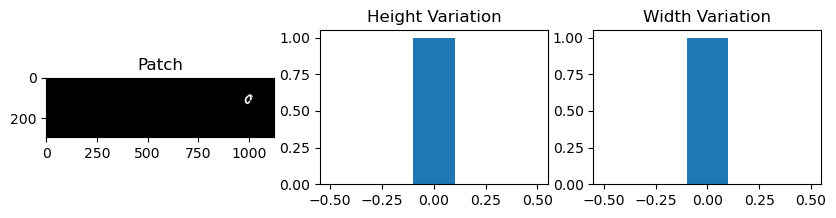

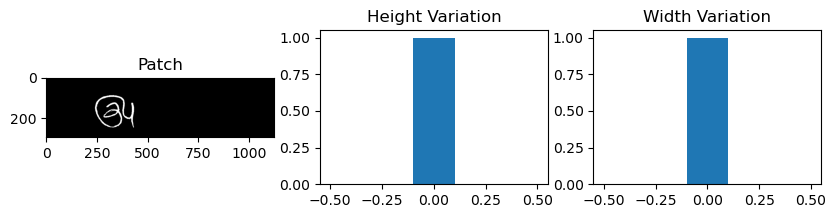

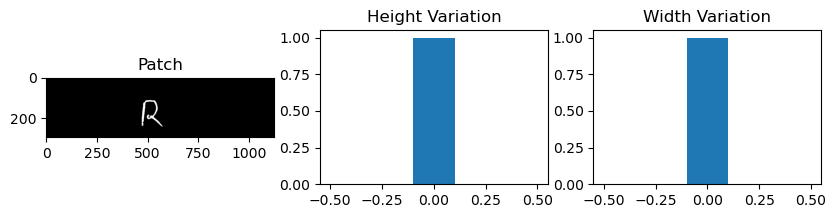

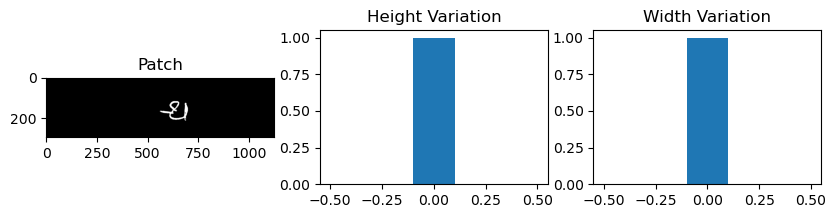

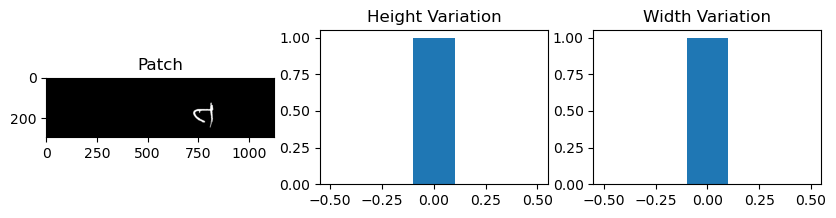

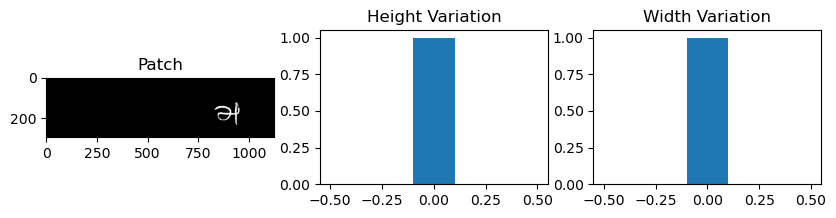

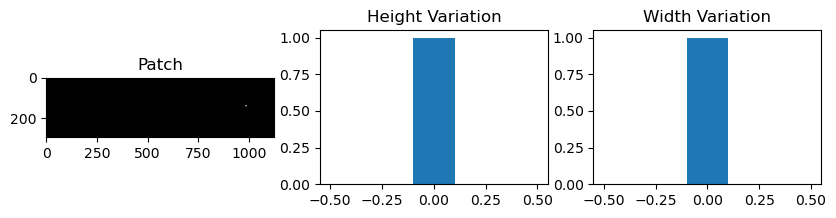

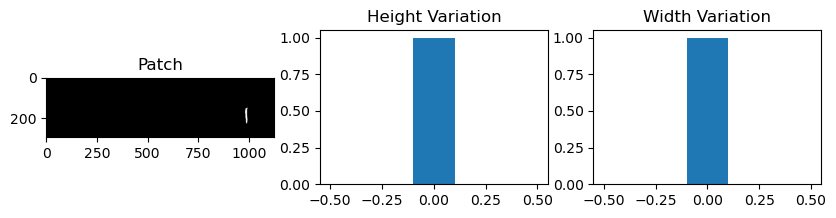

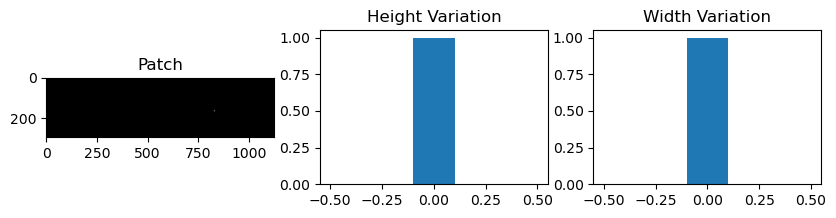

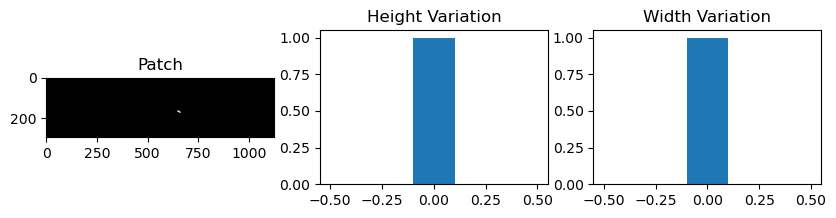

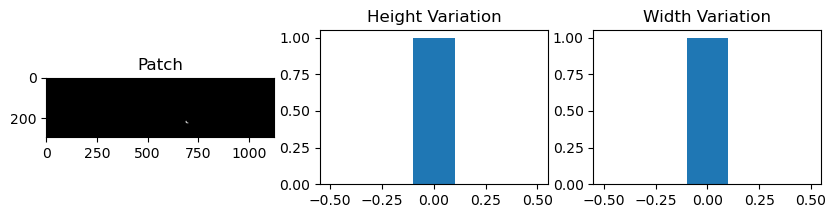

Patch 0 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 860}
Patch 1 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 6746}
Patch 2 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 3081}
Patch 3 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 3377}
Patch 4 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 2469}
Patch 5 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 3126}
Patch 6 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 36}
Patch 7 features: {'height_variation': 0.0, 'width_variation': 0.0, 'num_components': 1, 'max_component_size': 617}
Patch 8 features: {'height_variation': 0.0, 'width_variation': 0.0, 

In [16]:
def extract_features(patches):
    features_list = []
    
    for stat, patch in patches:
        current_features = {}
        height_variation, width_variation = compute_variation(patch)
        current_features['height_variation'] = height_variation
        current_features['width_variation'] = width_variation
        num_components, max_component_size = compute_components(patch)
        current_features['num_components'] = num_components
        current_features['max_component_size'] = max_component_size
        features_list.append(current_features)
        
        # Visualize the features (optional)
        plt.figure(figsize=(10, 2))
        plt.subplot(1, 3, 1)
        plt.imshow(patch, cmap='gray')
        plt.title(f'Patch')
        
        plt.subplot(1, 3, 2)
        plt.hist(height_variation, bins=5)
        plt.title('Height Variation')
        
        plt.subplot(1, 3, 3)
        plt.hist(width_variation, bins=5)
        plt.title('Width Variation')
        
        plt.show()
    
    return features_list

# Assuming 'patches' is the list of patches obtained from the previous step
features_list = extract_features(patches)

# Print the features to check
for i, features in enumerate(features_list):
    print(f'Patch {i} features: {features}')


In [18]:
import cv2
import numpy as np

# Function to compute the overlap between connected components within a patch
def compute_overlap(patch):
    contours, _ = cv2.findContours(patch, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    overlap_area = 0
    for i, contour_i in enumerate(contours):
        for j, contour_j in enumerate(contours):
            if i >= j:  # Avoid double counting and self-counting
                continue
            rect_i = cv2.boundingRect(contour_i)
            rect_j = cv2.boundingRect(contour_j)
            # Compute the intersection area
            dx = min(rect_i[0] + rect_i[2], rect_j[0] + rect_j[2]) - max(rect_i[0], rect_j[0])
            dy = min(rect_i[1] + rect_i[3], rect_j[1] + rect_j[3]) - max(rect_i[1], rect_j[1])
            if (dx>=0) and (dy>=0):
                overlap_area += dx*dy
    return overlap_area

# Function to estimate the percentage of text above the current patch
# This requires knowing the total height of the document and the vertical position of the patch
def compute_percentage_above(stat, total_height):
    # stat[cv2.CC_STAT_TOP] gives the vertical starting position of the component
    vertical_position = stat[cv2.CC_STAT_TOP]
    percentage_above = (vertical_position / total_height) * 100 if total_height > 0 else 0
    return percentage_above

# Assuming 'patches' is the list of patches obtained from the previous step
# and 'total_height' is the known height of the entire document image
total_height = 1000  # Example, replace with the actual height of your document image

# Update the feature extraction process
def extract_features(patches, total_height):
    features_list = []
    
    for stat, patch in patches:
        current_features = {}
        
        # Compute overlap
        overlap = compute_overlap(patch)
        current_features['overlap'] = overlap
        
        # Compute percentage of text above
        percentage_above = compute_percentage_above(stat, total_height)
        current_features['percentage_above'] = percentage_above
        
        # Number of components (already computed in previous examples)
        num_components, _ = compute_components(patch)
        current_features['num_components'] = num_components
        
        features_list.append(current_features)
    
    return features_list

# Extract features including overlap and percentage of text above
features_list = extract_features(patches, total_height)

# Print the features to check
for i, features in enumerate(features_list):
    print(f'Patch {i} features: {features}')


Patch 0 features: {'overlap': 0, 'percentage_above': 8.0, 'num_components': 1}
Patch 1 features: {'overlap': 0, 'percentage_above': 8.4, 'num_components': 1}
Patch 2 features: {'overlap': 0, 'percentage_above': 10.9, 'num_components': 1}
Patch 3 features: {'overlap': 0, 'percentage_above': 11.3, 'num_components': 1}
Patch 4 features: {'overlap': 0, 'percentage_above': 12.1, 'num_components': 1}
Patch 5 features: {'overlap': 0, 'percentage_above': 12.0, 'num_components': 1}
Patch 6 features: {'overlap': 0, 'percentage_above': 13.3, 'num_components': 1}
Patch 7 features: {'overlap': 0, 'percentage_above': 14.6, 'num_components': 1}
Patch 8 features: {'overlap': 0, 'percentage_above': 15.7, 'num_components': 1}
Patch 9 features: {'overlap': 0, 'percentage_above': 16.0, 'num_components': 1}
Patch 10 features: {'overlap': 0, 'percentage_above': 21.099999999999998, 'num_components': 1}


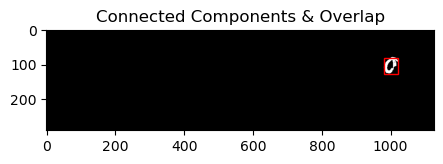

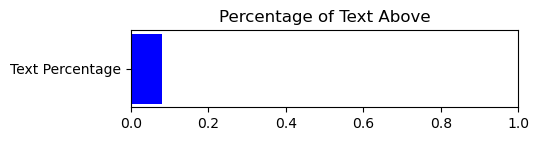

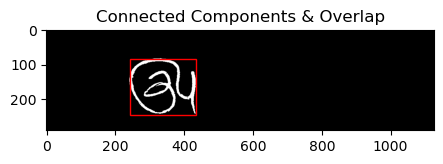

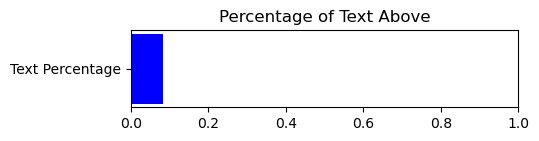

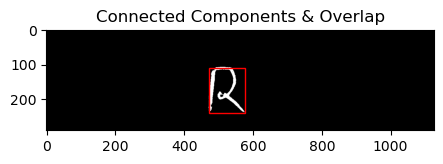

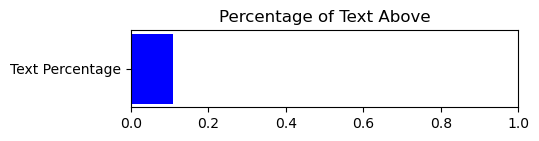

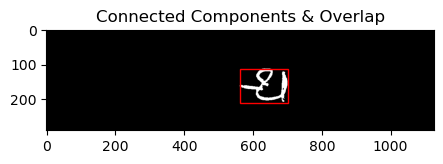

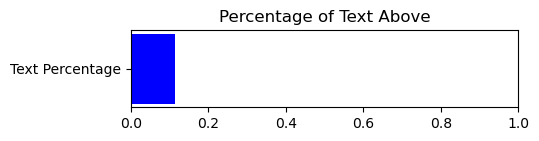

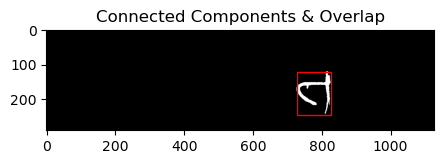

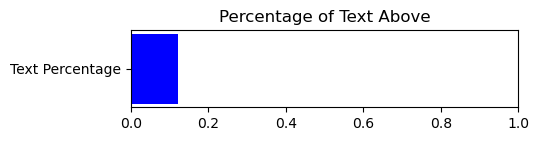

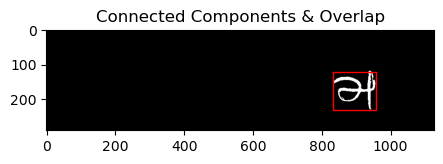

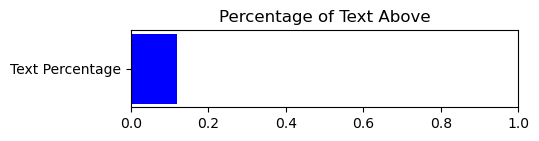

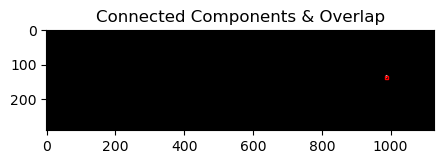

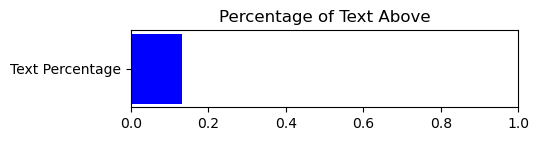

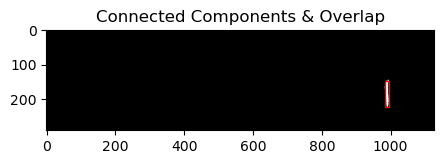

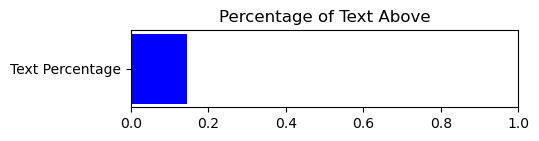

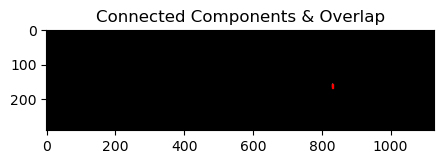

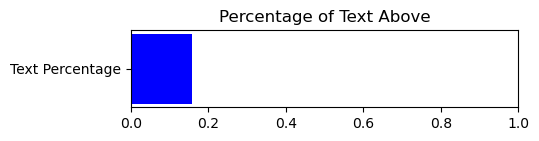

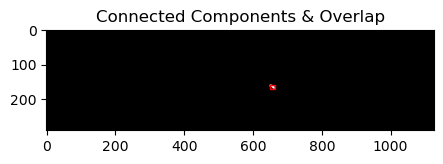

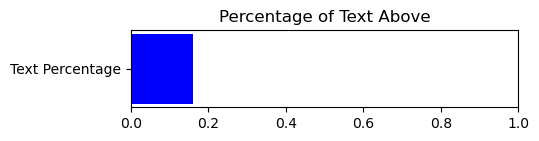

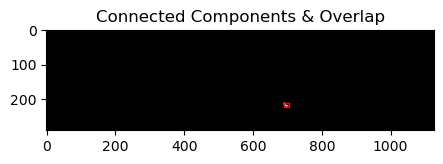

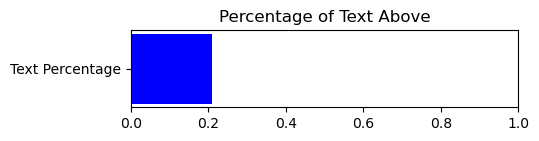

Patch 0 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 860, 'percentage_above': 8.0}
Patch 1 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 6746, 'percentage_above': 8.4}
Patch 2 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 3081, 'percentage_above': 10.9}
Patch 3 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 3377, 'percentage_above': 11.3}
Patch 4 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 2469, 'percentage_above': 12.1}
Patch 5 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 3126, 'percentage_above': 12.0}
Patch 6 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 36, 'percentage_above': 13.3}
Patch 7 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 617, 'percentage_above': 14.6}
Patch 8 features: {'overlap': 0, 'num_components': 1, 'max_component_size': 18, 'percentage_above': 15.7}
Patch 9 features: {'overlap': 0, 'nu

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

# Function to visualize the connected components and the overlap
def visualize_components_and_overlap(patch, stat, total_height):
    # Draw the original patch
    fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.imshow(patch, cmap='gray')
    ax.set_title('Connected Components & Overlap')

    # Draw the bounding boxes and compute overlap
    contours, _ = cv2.findContours(patch, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    overlap_area = 0
    rectangles = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        rectangles.append(ptch.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))

        # Add the rectangles to the plot
        for rect in rectangles:
            ax.add_patch(rect)

    # Compute overlap area (brute-force approach for visualization)
    for i in range(len(rectangles)):
        for j in range(i+1, len(rectangles)):
            overlap = rectangles[i].get_bbox().intersect(rectangles[j].get_bbox()).area
            overlap_area += overlap

    # Show the image with bounding boxes
    plt.show()

    # Plot the percentage of text above
    plt.figure(figsize=(5, 1))
    plt.barh(['Text Percentage'], [stat[cv2.CC_STAT_TOP]/total_height], color='blue')
    plt.title('Percentage of Text Above')
    plt.xlim(0, 1)
    plt.show()

    return overlap_area

# Update the feature extraction process to include visualization
def extract_features_with_visualization(patches, total_height):
    features_list = []
    
    for stat, patch in patches:
        current_features = {}
        
        # Visualize components and compute overlap
        overlap_area = visualize_components_and_overlap(patch, stat, total_height)
        current_features['overlap'] = overlap_area
        
        # Compute number of components and maximum component size
        num_components, max_component_size = compute_components(patch)
        current_features['num_components'] = num_components
        current_features['max_component_size'] = max_component_size
        
        # Compute percentage of text above
        percentage_above = compute_percentage_above(stat, total_height)
        current_features['percentage_above'] = percentage_above
        
        features_list.append(current_features)
        
    return features_list

# Extract features and visualize
features_list = extract_features_with_visualization(patches, total_height)

# Print the features to check
for i, features in enumerate(features_list):
    print(f'Patch {i} features: {features}')

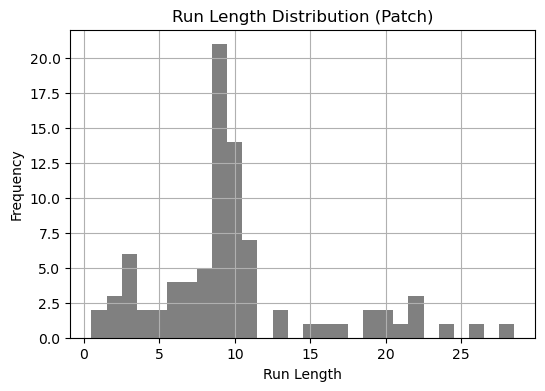

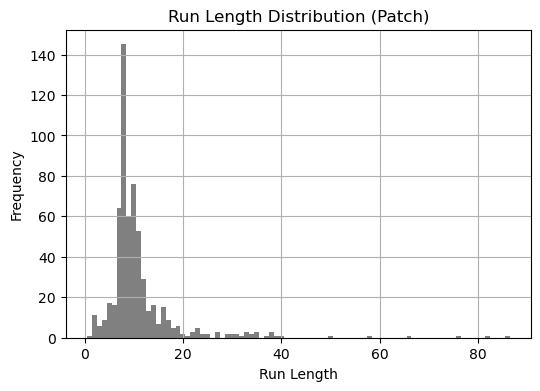

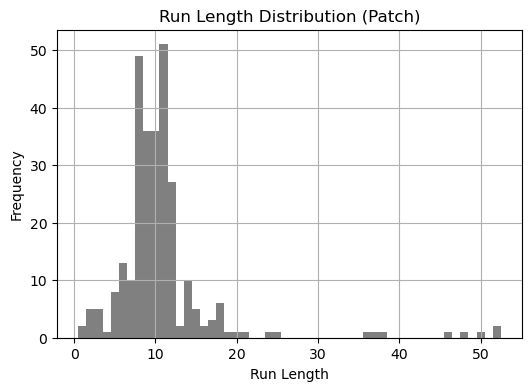

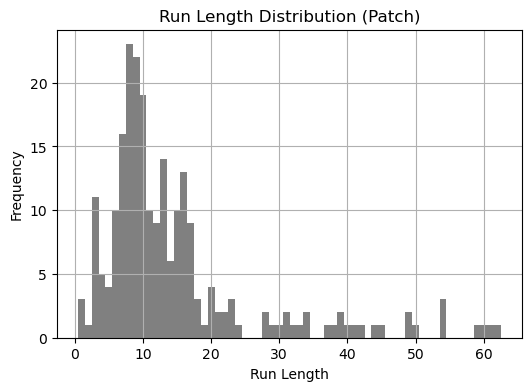

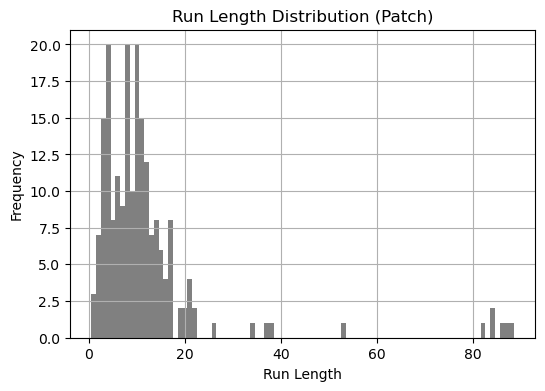

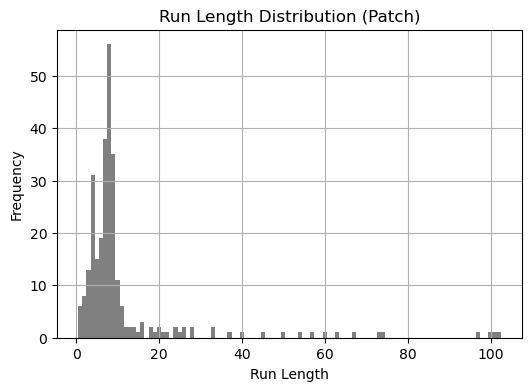

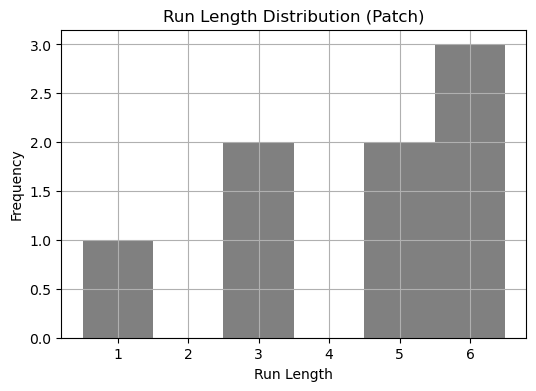

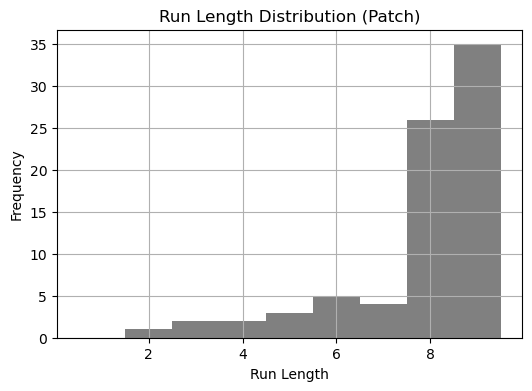

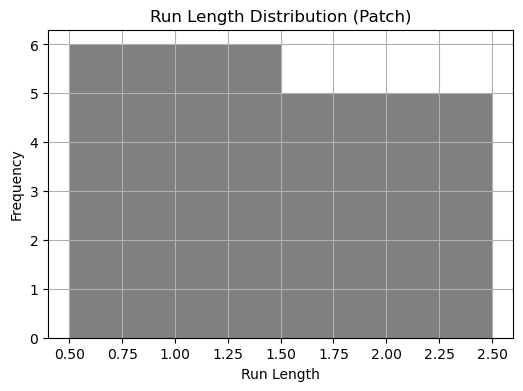

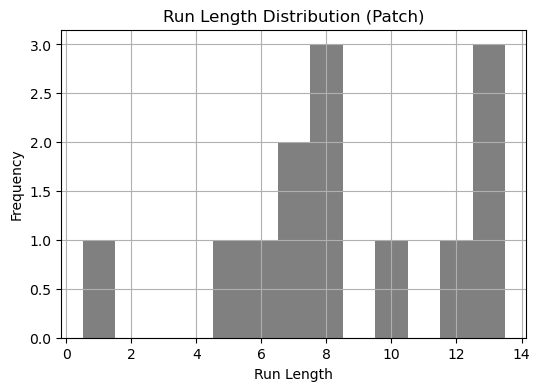

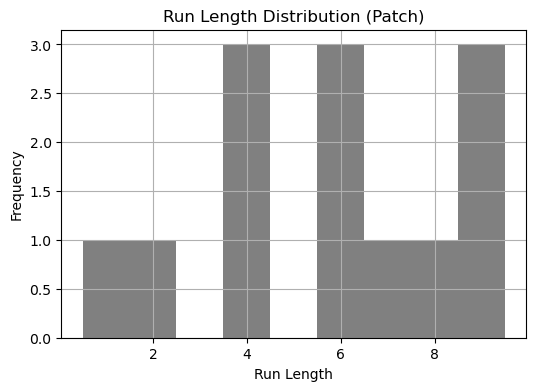

Patch 0 features: {'max_run_length': 29, 'avg_run_length': 10.0}
Patch 1 features: {'max_run_length': 87, 'avg_run_length': 11.187396351575456}
Patch 2 features: {'max_run_length': 53, 'avg_run_length': 10.848591549295774}
Patch 3 features: {'max_run_length': 63, 'avg_run_length': 14.682608695652174}
Patch 4 features: {'max_run_length': 89, 'avg_run_length': 12.102941176470589}
Patch 5 features: {'max_run_length': 103, 'avg_run_length': 11.204301075268818}
Patch 6 features: {'max_run_length': 7, 'avg_run_length': 4.5}
Patch 7 features: {'max_run_length': 10, 'avg_run_length': 7.910256410256411}
Patch 8 features: {'max_run_length': 3, 'avg_run_length': 1.6363636363636365}
Patch 9 features: {'max_run_length': 14, 'avg_run_length': 8.692307692307692}
Patch 10 features: {'max_run_length': 10, 'avg_run_length': 5.923076923076923}


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute maximum and average run length in a binary image patch
def compute_run_lengths(patch):
    max_run_length = 0
    total_run_length = 0
    run_count = 0

    for row in patch:
        current_run_length = 0
        for pixel in row:
            if pixel == 255:  # Assuming foreground is white
                current_run_length += 1
            else:
                if current_run_length > 0:
                    max_run_length = max(max_run_length, current_run_length)
                    total_run_length += current_run_length
                    run_count += 1
                    current_run_length = 0
        # Check end of row
        if current_run_length > 0:
            max_run_length = max(max_run_length, current_run_length)
            total_run_length += current_run_length
            run_count += 1

    avg_run_length = total_run_length / run_count if run_count > 0 else 0
    return max_run_length, avg_run_length

# Update feature extraction to include run length features
def extract_features_with_run_length(patches):
    features_list = []

    for stat, patch in patches:
        current_features = {}
        
        # Compute run length features
        max_run_length, avg_run_length = compute_run_lengths(patch)
        current_features['max_run_length'] = max_run_length
        current_features['avg_run_length'] = avg_run_length

        features_list.append(current_features)

        # Visualize the histogram of run lengths for this patch (optional)
        run_lengths = []
        for row in patch:
            current_run_length = 0
            for pixel in row:
                if pixel == 255:  # Foreground pixel
                    current_run_length += 1
                else:
                    if current_run_length > 0:
                        run_lengths.append(current_run_length)
                        current_run_length = 0
            if current_run_length > 0:
                run_lengths.append(current_run_length)

        plt.figure(figsize=(6, 4))
        plt.hist(run_lengths, bins=range(1, max(run_lengths)+1), align='left', color='gray')
        plt.title(f'Run Length Distribution (Patch)')
        plt.xlabel('Run Length')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    return features_list

# Assuming 'patches' is the list of patches obtained from the previous step
features_list = extract_features_with_run_length(patches)

# Print the features to check
for i, features in enumerate(features_list):
    print(f'Patch {i} features: {features}')

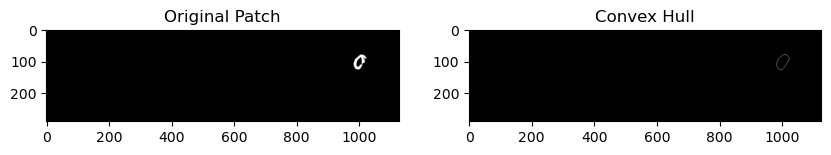

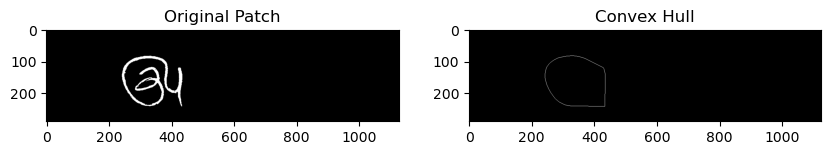

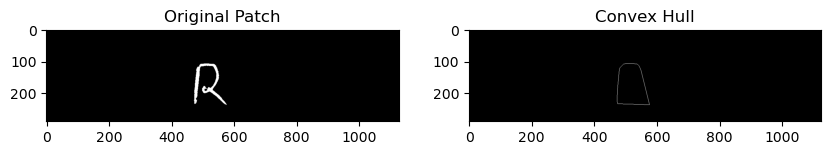

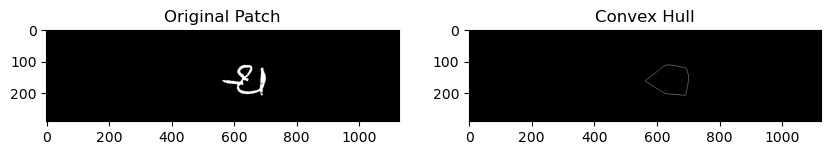

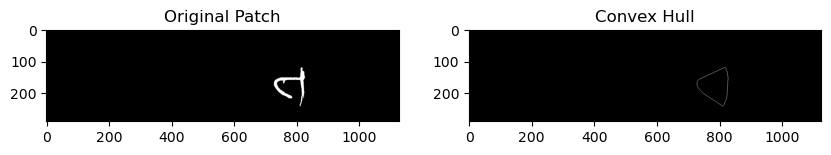

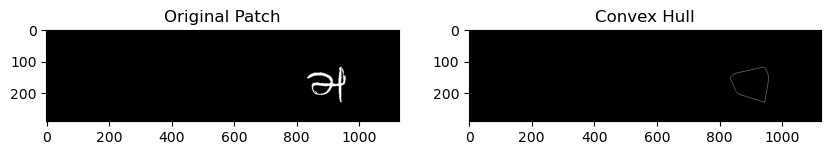

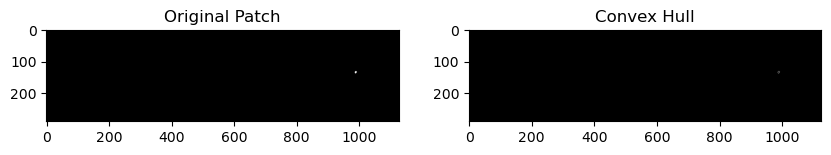

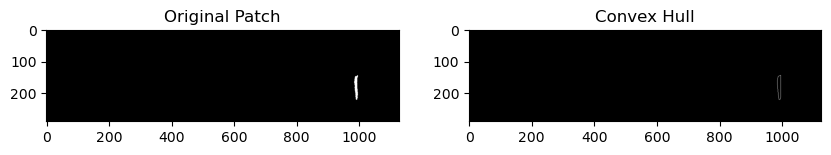

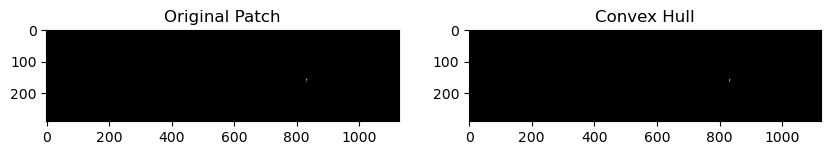

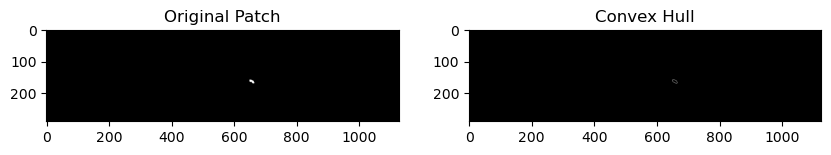

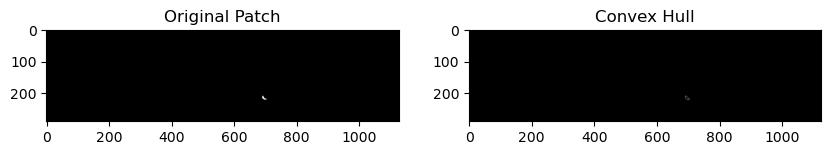

Patch 0 features: {'convex_hull_points': 23}
Patch 1 features: {'convex_hull_points': 44}
Patch 2 features: {'convex_hull_points': 19}
Patch 3 features: {'convex_hull_points': 23}
Patch 4 features: {'convex_hull_points': 20}
Patch 5 features: {'convex_hull_points': 21}
Patch 6 features: {'convex_hull_points': 7}
Patch 7 features: {'convex_hull_points': 14}
Patch 8 features: {'convex_hull_points': 5}
Patch 9 features: {'convex_hull_points': 9}
Patch 10 features: {'convex_hull_points': 11}


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate and visualize the convex hull of a binary image patch
def compute_convex_hull(patch):
    # Find contours in the patch
    contours, _ = cv2.findContours(patch, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Concatenate all contours to find the overall convex hull
        all_points = np.vstack(contours)
        hull = cv2.convexHull(all_points)
        # Draw the convex hull
        hull_image = np.zeros_like(patch)
        cv2.drawContours(hull_image, [hull], -1, (255), 1)
        
        # Visualize the original patch and its convex hull
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(patch, cmap='gray')
        plt.title('Original Patch')
        
        plt.subplot(1, 2, 2)
        plt.imshow(hull_image, cmap='gray')
        plt.title('Convex Hull')
        plt.show()
        
        # Return the number of points in the convex hull
        return len(hull)
    else:
        return 0

# Update feature extraction to include convex hull points
def extract_features_with_convex_hull(patches):
    features_list = []

    for stat, patch in patches:
        current_features = {}
        
        # Compute convex hull points
        convex_hull_points = compute_convex_hull(patch)
        current_features['convex_hull_points'] = convex_hull_points

        features_list.append(current_features)

    return features_list

# Assuming 'patches' is the list of patches obtained from the previous step
features_list = extract_features_with_convex_hull(patches)

# Print the features to check
for i, features in enumerate(features_list):
    print(f'Patch {i} features: {features}')


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance_between_hulls(hull1, hull2):
    """ Calculate the minimal distance between points on two convex hulls. """
    min_dist = float('inf')
    for point1 in hull1:
        for point2 in hull2:
            dist = np.linalg.norm(point1 - point2)
            if dist < min_dist:
                min_dist = dist
    return min_dist

def calculate_transition_features(patches):
    transition_features_list = []

    # We'll assume patches are in a sequence and calculate features between each consecutive pair
    for i in range(len(patches) - 1):
        current_features = {}
        patch1, patch2 = patches[i], patches[i+1]

        # Relative location (assuming horizontal adjacency)
        current_features['relative_location'] = 'right/left'  # Example, since it's sequential

        # Convex hull distance
        contours1, _ = cv2.findContours(patch1[1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours2, _ = cv2.findContours(patch2[1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        hull1 = cv2.convexHull(np.vstack(contours1))
        hull2 = cv2.convexHull(np.vstack(contours2))
        convex_hull_distance = calculate_distance_between_hulls(hull1[:, 0, :], hull2[:, 0, :])
        current_features['convex_hull_distance'] = convex_hull_distance

        # Ratio of aspect ratios
        aspect_ratio1 = patch1[0][cv2.CC_STAT_WIDTH] / patch1[0][cv2.CC_STAT_HEIGHT]
        aspect_ratio2 = patch2[0][cv2.CC_STAT_WIDTH] / patch2[0][cv2.CC_STAT_HEIGHT]
        current_features['ratio_of_aspect_ratios'] = aspect_ratio1 / aspect_ratio2

        # Ratio of number of components
        num_components1 = patch1[0]['num_components']
        num_components2 = patch2[0]['num_components']
        current_features['ratio_of_number_of_components'] = num_components1 / num_components2 if num_components2 > 0 else float('inf')

        transition_features_list.append(current_features)

    return transition_features_list

# Assuming 'features_list' contains feature dictionaries for each patch
# Create a hypothetical patches list for demonstration
features_list = [
    ({'num_components': 3, cv2.CC_STAT_WIDTH: 50, cv2.CC_STAT_HEIGHT: 10}, np.random.randint(0, 255, (10, 50), dtype=np.uint8)),
    ({'num_components': 5, cv2.CC_STAT_WIDTH: 45, cv2.CC_STAT_HEIGHT: 12}, np.random.randint(0, 255, (12, 45), dtype=np.uint8))
]

# Calculate transition features
transition_features = calculate_transition_features(features_list)
for feature in transition_features:
    print(feature)

{'relative_location': 'right/left', 'convex_hull_distance': 0.0, 'ratio_of_aspect_ratios': 1.3333333333333333, 'ratio_of_number_of_components': 0.6}
